In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

In [8]:
result_loc = "./../../../../Server_results/09_13_2021/"
train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1623326650/"

In [9]:
pwd

'd:\\Research_git\\Research_information_theory_3\\Information-Theory-2\\Optimization'

In [10]:
run_name = "experiment13_09_04_32_31"

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])


N_steps = q_x.shape[2]

In [11]:
q_x.shape

(4, 64, 50)

In [12]:
p.shape

(4, 64)

In [13]:
# df_k_imp = pd.read_csv(f"{result_loc}check_initialq_x.txt",sep='\t',header=None)

In [14]:
def plot_cdf(p,qoi,time_step,epoch):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(QOI[index],np.cumsum(P))


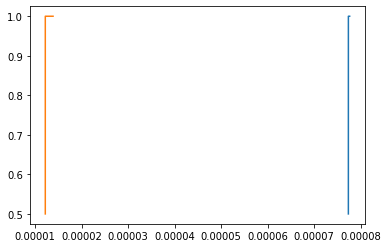

In [29]:
plot_cdf(p,q_x,2,0)
plot_cdf(p,q_x,2,3)
# plot_cdf(p,q_x,2,7)
# # plot_cdf(p,q_x,2,11)
# plot_cdf(p,q_x,2,13)

# # plot_cdf(p,q_x,0,7)

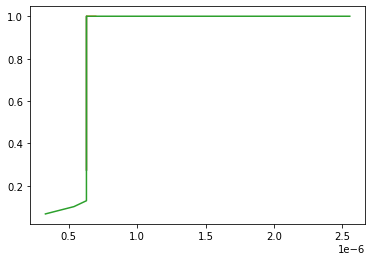

In [16]:
plot_cdf(p,q_y,2,1)
plot_cdf(p,q_y,2,3)
plot_cdf(p,q_y,2,7)
# plot_cdf(p,q_y,2,11)

# plot_cdf(p,q_y,0,5)
# plot_cdf(p,q_y,0,6)
# plot_cdf(p,q_y,0,7)

In [16]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


In [17]:
q_MC_x.shape

(100, 1800)

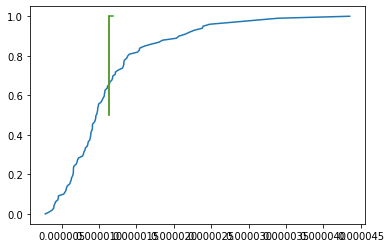

In [31]:
time_step = 30

ii = N_steps_orig//(N_steps-1) * (time_step) -1



Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

plot_cdf(p,q_x,time_step,1)

plot_cdf(p,q_x,time_step,3)

# plot_cdf(p,q_x,time_step,13)




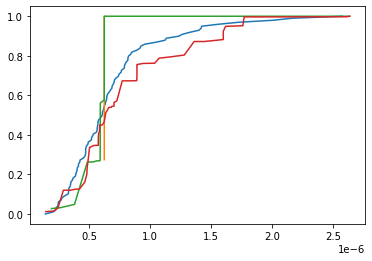

In [39]:
time_step = 3

ii = N_steps_orig//(N_steps-1) * (time_step) -1



Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

plot_cdf(p,q_y,time_step,1)

plot_cdf(p,q_y,time_step,8)

plot_cdf(p,q_y,time_step,13)




In [26]:
Q_MC = q_MC_x[:,ii]


In [31]:
time_step = 10

ii = N_steps_orig//N_steps * time_step 

ii

1800

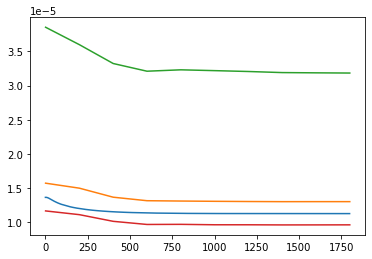

In [23]:

epoch = 6

plt.plot(q_MC_x.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

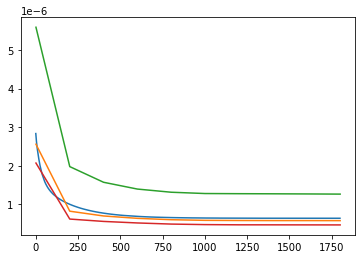

In [24]:
epoch = 6

plt.plot(q_MC_y.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))